# Support Vector Machine (SVM) for Classification
This notebook demonstrates the use of different kernels in SVM for a binary classification task.

### Key Sections:
- Data Preparation
- Model Training with RBF and Sigmoid Kernels
- Model Evaluation using Accuracy, Precision, Recall, and F1-Score
- Saving the Trained Model

Feel free to modify or improve upon this notebook as needed!

# Support Vector Machine (SVM) for Classification
This notebook demonstrates the use of different kernels in SVM for a binary classification task.

### Key Sections:
- Data Preparation
- Model Training with RBF and Sigmoid Kernels
- Model Evaluation using Accuracy, Precision, Recall, and F1-Score
- Saving the Trained Model

Feel free to modify or improve upon this notebook as needed!

# Scraping Data Aplikasi BRImo

In [ ]:
#!pip install google-play-scraper

In [ ]:
#from google_play_scraper import app

#import pandas as pd

#import numpy as np

In [ ]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

#from google_play_scraper import Sort, reviews

#result, continuation_token = reviews(
#    'id.co.bri.brimo',
#    lang='id', # defaults to 'en'
#    country='id', # defaults to 'us'
#    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
#    count=4000, # defaults to 100
#    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
# )

In [ ]:
# df_brimo = pd.DataFrame(np.array(result),columns=['review'])

# df_brimo = df_brimo.join(pd.DataFrame(df_brimo.pop('review').tolist()))

# df_brimo.head()

In [ ]:
# len(df_brimo.index) #count the number of data we got

In [ ]:
# df_brimo[['userName', 'score','at', 'content']].head()  #preview userName, rating, date-time, and reviews only

In [ ]:
#Run This Code to Sort the Data By Date

# new_df = df_brimo[['userName', 'score','at', 'content']]
# sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
# sorted_df.head()

In [ ]:
# my_df = sorted_df[['userName', 'score','at', 'content']] #get userName, rating, date-time, and reviews only

In [ ]:
# my_df.head()

In [ ]:
# my_df.to_csv("scrapped_data.csv", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

# Download & Import Package

In [140]:
# https://pypi.org/project/indonlp/0.2.0/
!pip install indoNLP

In [141]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from indoNLP.preprocessing import pipeline, remove_stopwords, replace_slang, replace_word_elongation, emoji_to_words

# Read Dataset

In [142]:
df_brimo = pd.read_csv('scrapped_dataBrimo_Skripsi.csv')

* userName (Nama pengguna yang komen) <br>
* score (Rating sesuai dengan ulasan pengguna aplikasi) <br>
* at (Tanggal, tahun, dan jam komentar) <br>
* content (Isi ulasan pengguna aplikasi)

In [143]:
df_brimo.head()

,userName,score,at,content
0,Pengguna Google,5,2024-10-13 09:15:24,Sangat membantu
1,Pengguna Google,5,2024-10-13 09:07:26,"BRI,bank paling lama melayani masyarakat indon..."
2,Pengguna Google,5,2024-10-13 08:55:20,Mantap
3,Pengguna Google,5,2024-10-13 08:54:59,Nice
4,Pengguna Google,5,2024-10-13 08:53:46,Saya sangat puas dg pelayanan BRI


In [144]:
dataset = len(df_brimo.index) #count the number of data we got
print("Jumlah Data yang diambil:", dataset)

Jumlah Data yang diambil: 4000


# Pelabelan

In [145]:
def pelabelan(rating):
    if rating in [1, 2, 3, 4]:
        return 0
    elif rating in [5]:
        return 1

df_brimo['Label'] = df_brimo ['score'].apply(pelabelan)

* userName (Nama pengguna yang komen) <br>
* score (Rating sesuai dengan ulasan pengguna aplikasi) <br>
* at (Tanggal, tahun, dan jam komentar) <br>
* content (Isi ulasan pengguna aplikasi)
* Label (pembagian ulasan penngguna sesuai Rating, jika label 0 maka ulasan positif, sedangkan label 1 maka ulasan negatif)

In [146]:
selected_column = ['content', 'Label']
df_brimo = df_brimo[selected_column]
df_brimo.head()

,content,Label
0,Sangat membantu,1
1,"BRI,bank paling lama melayani masyarakat indon...",1
2,Mantap,1
3,Nice,1
4,Saya sangat puas dg pelayanan BRI,1


Menghitung Jumlah Data Negatif dan Positif

In [147]:
# Menghitung jumlah data negatif dan positif
jumlah_negatif = (df_brimo['Label'] == 0).sum()
jumlah_positif = (df_brimo['Label'] == 1).sum()

# Menampilkan hasil
print("Jumlah data negatif:", jumlah_negatif)
print("Jumlah data positif:", jumlah_positif)

Jumlah data negatif: 665
Jumlah data positif: 3335


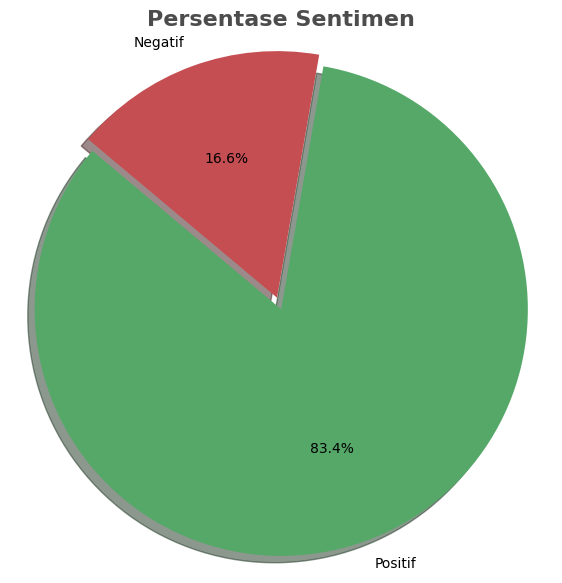

In [148]:
# Menyusun data sentimen dan label
Label = [jumlah_positif, jumlah_negatif]
labels = ['Positif', 'Negatif']

# Menentukan warna untuk setiap sektor
colors = ['#55a868', '#c44e52']  # Hijau untuk positif, merah untuk negatif

# Membuat Pie Chart dengan modifikasi
plt.figure(figsize=(7, 7))  # Mengatur ukuran pie chart
plt.pie(
    Label,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,  # Menambahkan bayangan
    explode=(0.05, 0)  # Memisahkan sedikit bagian positif
)

# Menambahkan judul
plt.title('Persentase Sentimen', fontsize=16, fontweight='bold', color='#4c4c4c')

# Menampilkan Pie Chart
plt.axis('equal')  # Agar pie chart bulat sempurna
plt.show()

In [149]:
!pip install pandas wordcloud matplotlib

In [155]:
df_positif=df_brimo[df_brimo['Label']==1]
df_negatif=df_brimo[df_brimo['Label']==0]

WordCloud Positif

In [156]:
all_words_lem = ' '.join([str(word) for word in df_brimo['content'] if isinstance(word, str)])

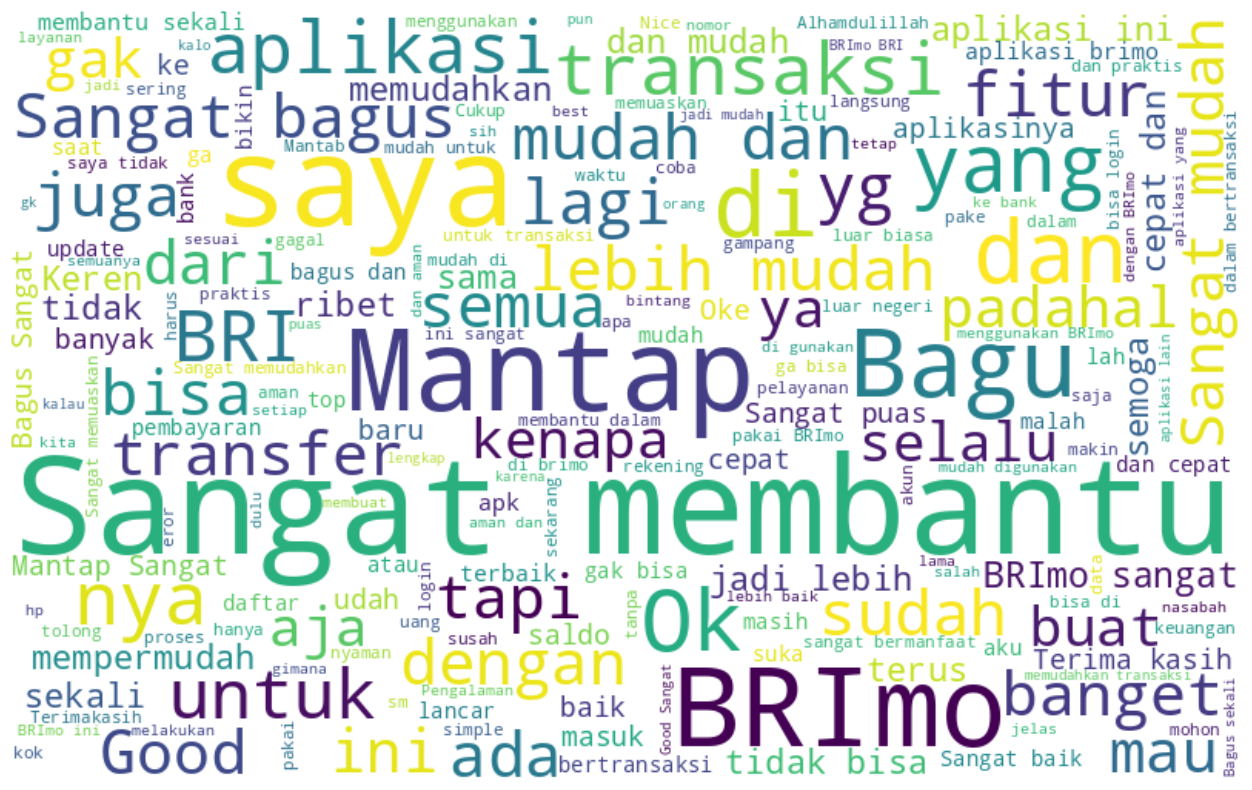

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

WordCloud Negatif

In [158]:
df_negatif['content'] = df_negatif['content'].astype(str)
all_words_lemneg = ' '.join([word for word in df_negatif['content']])

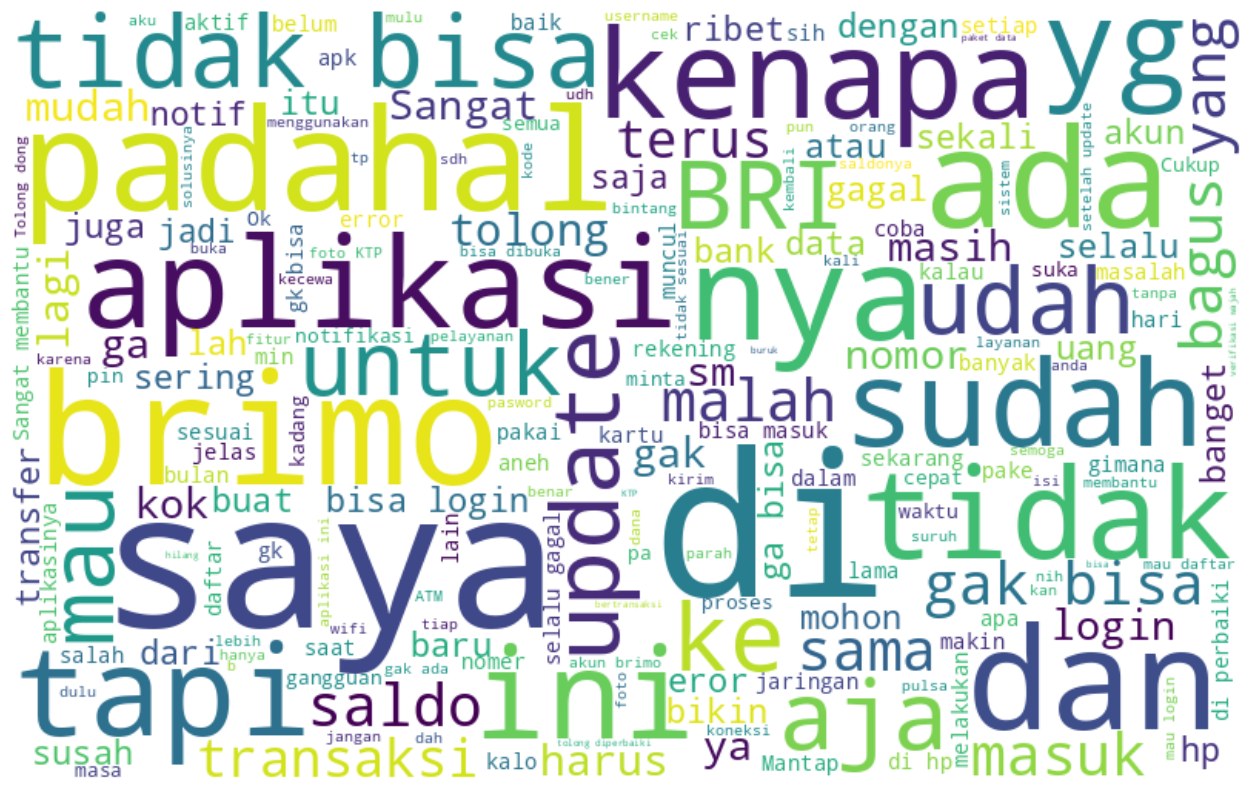

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# Remove Null

menghilangkan nilai-nilai yang hilang (null) atau kosong

In [160]:
print('Jumlah data null : ')
print(df_brimo.isnull().sum())

Jumlah data null : 
content    0
Label      0
dtype: int64


# Preprocessing Data

In [161]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Cleaning Data

In [162]:
import re

# Fungsi untuk menghapus emotikon dari teks
def remove_emoticons(text):

    # Pola reguler untuk mencocokkan emotikon
    emoticon_pattern = r'\s+:\)|:\(|:-\)|:-\(|;\)|;-\)|<3|:-D|:-P|:-O|<3|:\'\(|:\*|:O|:\/|:-\||:\||8-\)|:-\*|=\)|=\(|B-\)|<3|XD|xD'

    # Mengganti emotikon dengan spasi
    clean_text = re.sub(emoticon_pattern, ' ', text)
    return clean_text

# Menghapus URL dari kolom konten
df_brimo['content'] = df_brimo['content'].str.replace('https\S+', ' ', case=False)
# Merubah Teks Jadi Lower Case
df_brimo['content'] = df_brimo['content'].str.lower()
# Menghapus mention
df_brimo['content'] = df_brimo['content'].str.replace('@\S+', ' ', case=False)
# Menghapus Hashtag
df_brimo['content'] = df_brimo['content'].str.replace('#\S+', ' ', case=False)
# Menghapus next karakter
df_brimo['content'] = df_brimo['content'].str.replace("\'\w+", ' ', case=False)
# Menghapus tanda baca
df_brimo['content'] = df_brimo['content'].str.replace("[^\w\s]", ' ', case=False)
# Menghapus extra whitespace
df_brimo['content'] = df_brimo['content'].str.replace("\s(2)", ' ', case=False)
# Menggunakan fungsi remove_emoticons untuk menghapus emotikon
df_brimo['content'] = df_brimo['content'].apply(remove_emoticons)
# Menampilkan DataFrame setelah pembersihan
print(df_brimo['content'])

0                                         sangat membantu
1       bri,bank paling lama melayani masyarakat indon...
2                                                  mantap
3                                                    nice
4                       saya sangat puas dg pelayanan bri
                              ...                        
3995                                                 baik
3996                                                   ok
3997                      bisa ganti pin atm lewat brimo?
3998                               mudah, sangat membantu
3999                                                 baik
Name: content, Length: 4000, dtype: object


# Tokenizing

In [163]:
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df_brimo['content_token']=df_brimo['content'].apply(regexp.tokenize)
df_brimo.head(3)

,content,Label,content_token
0,sangat membantu,1,"[sangat, membantu]"
1,"bri,bank paling lama melayani masyarakat indon...",1,"[bri, bank, paling, lama, melayani, masyarakat..."
2,mantap,1,[mantap]


# Filtering

In [164]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
from nltk.corpus import stopwords
# membuat daftar stopwords dalam bahasa Indonesia
stopwords = nltk.corpus.stopwords.words("indonesian")
# kustom kata-kata yang akan di stopwords sesuai kebutuhan
my_stopwords = ['brimo','aplikasi']
stopwords.extend(my_stopwords)

# Remove kata-kata yang distopwords
df_brimo['content_token'] = df_brimo['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_brimo.head(5)

,content,Label,content_token
0,sangat membantu,1,[membantu]
1,"bri,bank paling lama melayani masyarakat indon...",1,"[bri, bank, melayani, masyarakat, indonesia, s..."
2,mantap,1,[mantap]
3,nice,1,[nice]
4,saya sangat puas dg pelayanan bri,1,"[puas, dg, pelayanan, bri]"


# Stemming

In [166]:
!pip install Sastrawi

In [167]:
#import library
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [169]:
df_brimo['stemmed'] = df_brimo['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])

In [170]:
df_brimo.head(5)

,content,Label,content_token,stemmed
0,sangat membantu,1,[membantu],[bantu]
1,"bri,bank paling lama melayani masyarakat indon...",1,"[bri, bank, melayani, masyarakat, indonesia, s...","[bri, bank, layan, masyarakat, indonesia, moga..."
2,mantap,1,[mantap],[mantap]
3,nice,1,[nice],[nice]
4,saya sangat puas dg pelayanan bri,1,"[puas, dg, pelayanan, bri]","[puas, dg, layan, bri]"


In [171]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer


from sklearn.model_selection import train_test_split # Split Data

# Model Building
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

# TF-IDF

In [172]:
df_brimo.dropna(subset=['content'], inplace=True)

In [173]:
X = df_brimo['content']
y = df_brimo['Label']

In [174]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
# Menampilkan nama fitur (kata) yang sesuai dengan kolom matriks X_final
feature_names = tfid.get_feature_names_out()

# Menampilkan hasil hitungan TF-IDF untuk setiap dokumen
for doc_index, doc in enumerate(X):
    print(f"\nTF-IDF Matrix for Dokumen {doc_index + 1}:")
    for feature_index, feature_name in enumerate(feature_names):
        tfidf_value = X_final[doc_index, feature_index]
        if tfidf_value != 0:
            print(f"{feature_name}: {tfidf_value}")


TF-IDF Matrix for Dokumen 1:
membantu: 0.7794942914506687
sangat: 0.6264093307062243

TF-IDF Matrix for Dokumen 2:
baik: 0.1896348279639568
bank: 0.21395300679778936
bri: 0.18116452404449987
dan: 0.1274603072741832
indonesia: 0.28974048420771803
jaya: 0.2927755997573923
lama: 0.2690642129816847
makin: 0.26726838295364225
masyarakat: 0.32326834111732033
melayani: 0.34788680594128774
paling: 0.2690642129816847
pelayanan: 0.25505488346200456
semoga: 0.2226066323098122
terusmakin: 0.37837954730121576

TF-IDF Matrix for Dokumen 3:
mantap: 1.0

TF-IDF Matrix for Dokumen 4:
nice: 1.0

TF-IDF Matrix for Dokumen 5:
bri: 0.3378473134928567
dg: 0.6154980043692816
pelayanan: 0.4756428314282206
puas: 0.39706298589657696
sangat: 0.19711202436027137
saya: 0.29029834890596073

TF-IDF Matrix for Dokumen 6:
dalam: 0.430649344525446
lebih: 0.38376618667929674
mudah: 0.30488943848261624
tranfer: 0.7578305129269934

TF-IDF Matrix for Dokumen 7:
dan: 0.4466679321561331
memudahkan: 0.6603835589310197
mudah:

KeyboardInterrupt: 

In [175]:
import pickle

# Pembagian Data

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [177]:
print(y_test)

2230    1
668     1
3616    1
2363    1
142     1
       ..
1118    1
3572    1
2482    1
643     1
299     1
Name: Label, Length: 800, dtype: int64


In [178]:
print(y_train)

1161    1
2355    1
1831    1
156     0
195     1
       ..
835     0
3264    1
1653    1
2607    1
2732    0
Name: Label, Length: 3200, dtype: int64


In [179]:
print(X_test)

2230    perfeck bangetz... segala sesuatu cukup 1 geng...
668                                     saya sanggat puas
3616                       sangat membantu dan bermanfaat
2363                                      baik semua baik
142                  sangat membantu dan mudah di gunakan
                              ...                        
1118                                    mudah dan praktis
3572                                               mantab
2482    gak nyangka bisa daftar bri dari luar negeri, ...
643                         alhamdulillah sangat membantu
299                           aplikasi yg sangat membantu
Name: content, Length: 800, dtype: object


In [180]:
print(y_test)

2230    1
668     1
3616    1
2363    1
142     1
       ..
1118    1
3572    1
2482    1
643     1
299     1
Name: Label, Length: 800, dtype: int64


In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Contoh data
# Misalnya, X adalah kumpulan teks, dan y adalah label sentimen (0 atau 1)
X = df_brimo['content']  # Kolom teks
y = df_brimo['Label']    # Kolom label

# Mengonversi teks menjadi representasi numerik dengan TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

# Menginisialisasi dan melatih model SVC
classifier = SVC(kernel='linear', C=1, gamma=0.1, random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi dengan model
y_pred = classifier.predict(X_test)

## Modelling dan Evaluasi

# SVM 4 Kernel

## Linear Kernel

In [182]:
#Linear Kernel
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear', C=2, gamma=0.01, random_state=0)
classifier_linear.fit(X_train, y_train)

SVC(C=2, gamma=0.01, kernel='linear', random_state=0)

In [183]:
Linear_pred = classifier_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, Linear_pred)
print("Akurasi Linear Kernel :", accuracy_linear)

Akurasi Linear Kernel : 0.91875


In [184]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, Linear_pred)

# Menghitung accuracy
accuracy = accuracy_score(y_test, Linear_pred)

# Menghitung precision, recall, dan f1 dengan average='macro'
precision = precision_score(y_test, Linear_pred, average='macro')
recall = recall_score(y_test, Linear_pred, average='macro')
f1 = f1_score(y_test, Linear_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[ 79  50]
 [ 15 656]]
Accuracy: 0.91875
Precision: 0.8848020010849256
Recall: 0.7950242031446759
F1 Score: 0.8306580562801438


In [185]:
# Optionally, print the classification report for more detailed metrics
print(classification_report(y_test, Linear_pred, target_names=['1 Ulasan Positif', '0 Ulasan Negatif']))

                  precision    recall  f1-score   support

1 Ulasan Positif       0.84      0.61      0.71       129
0 Ulasan Negatif       0.93      0.98      0.95       671

        accuracy                           0.92       800
       macro avg       0.88      0.80      0.83       800
    weighted avg       0.91      0.92      0.91       800



## Polynomial Kernel

In [186]:
#Polynomial Kernel
from sklearn.svm import SVC
classifier_poly = SVC(kernel='poly', C=1, gamma=0.1, random_state=0)
classifier_poly.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='poly', random_state=0)

In [187]:
Poly_pred = classifier_poly.predict(X_test)
accuracy_Poly = accuracy_score(y_test, Poly_pred)
print("Akurasi Polynomial Kernel :", accuracy_Poly)

Akurasi Polynomial Kernel : 0.83875


In [188]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, Poly_pred)

# Menghitung accuracy
accuracy = accuracy_score(y_test, Poly_pred)

# Menghitung precision, recall, dan f1 dengan average='macro'
precision = precision_score(y_test, Poly_pred, average='macro')
recall = recall_score(y_test, Poly_pred, average='macro')
f1 = f1_score(y_test, Poly_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[  0 129]
 [  0 671]]
Accuracy: 0.83875
Precision: 0.419375
Recall: 0.5
F1 Score: 0.45615227736233854


In [189]:
# Optionally, print the classification report for more detailed metrics
print(classification_report(y_test, Poly_pred, target_names=['1 Ulasan Positif', '0 Ulasan Negatif']))

                  precision    recall  f1-score   support

1 Ulasan Positif       0.00      0.00      0.00       129
0 Ulasan Negatif       0.84      1.00      0.91       671

        accuracy                           0.84       800
       macro avg       0.42      0.50      0.46       800
    weighted avg       0.70      0.84      0.77       800



## RBF (Radial Basis Function) Kernel

In [190]:
#RBF Kernel
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)
classifier_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=0)

In [191]:
rbf_pred = classifier_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, rbf_pred)
print("Akurasi RBF Kernel :", accuracy_rbf)

Akurasi RBF Kernel : 0.89


In [192]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, rbf_pred)

# Menghitung accuracy
accuracy = accuracy_score(y_test, rbf_pred)

# Menghitung precision, recall, dan f1 dengan average='macro'
precision = precision_score(y_test, rbf_pred, average='macro')
recall = recall_score(y_test, rbf_pred, average='macro')
f1 = f1_score(y_test, rbf_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[ 45  84]
 [  4 667]]
Accuracy: 0.89
Precision: 0.9032582407130629
Recall: 0.6714379787197172
F1 Score: 0.7218666540242419


In [193]:
# Optionally, print the classification report for more detailed metrics
print(classification_report(y_test, rbf_pred, target_names=['1 Ulasan Positif', '0 Ulasan Negatif']))

                  precision    recall  f1-score   support

1 Ulasan Positif       0.92      0.35      0.51       129
0 Ulasan Negatif       0.89      0.99      0.94       671

        accuracy                           0.89       800
       macro avg       0.90      0.67      0.72       800
    weighted avg       0.89      0.89      0.87       800



## Sigmoid Kernel

In [194]:
#Sigmoid Kernel
from sklearn.svm import SVC
classifier_sigmo = SVC(kernel='sigmoid', C=1, gamma=0.1, random_state=0)
classifier_sigmo.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid', random_state=0)

In [195]:
sigmo_pred = classifier_sigmo.predict(X_test)
accuracy_sigmo = accuracy_score(y_test, sigmo_pred)
print("Akurasi Sigmoid Kernel :", accuracy_sigmo)

Akurasi Sigmoid Kernel : 0.85375


In [196]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, sigmo_pred)

# Menghitung accuracy
accuracy = accuracy_score(y_test, sigmo_pred)

# Menghitung precision, recall, dan f1 dengan average='macro'
precision = precision_score(y_test, sigmo_pred, average='macro')
recall = recall_score(y_test, sigmo_pred, average='macro')
f1 = f1_score(y_test, sigmo_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[ 12 117]
 [  0 671]]
Accuracy: 0.85375
Precision: 0.9257614213197969
Recall: 0.5465116279069767
F1 Score: 0.5450104268443848


In [197]:
# Optionally, print the classification report for more detailed metrics
print(classification_report(y_test, sigmo_pred, target_names=['1 Ulasan Positif', '0 Ulasan Negatif']))

                  precision    recall  f1-score   support

1 Ulasan Positif       1.00      0.09      0.17       129
0 Ulasan Negatif       0.85      1.00      0.92       671

        accuracy                           0.85       800
       macro avg       0.93      0.55      0.55       800
    weighted avg       0.88      0.85      0.80       800



In [216]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer_baru.sav')
joblib.dump(classifier_linear, 'linear_model.sav')
joblib.dump(classifier_poly, 'poly_model.sav')
joblib.dump(classifier_rbf, 'rbf_model.sav')
joblib.dump(classifier_sigmo, 'sigmoid_model.sav')

['sigmoid_model.sav']

In [217]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Memuat model dan TF-IDF vectorizer yang telah disimpan
try:
    tfidf_vectorizer = joblib.load('tfidf_vectorizer_baru.sav')
    model_linear = joblib.load('linear_model.sav')
    model_poly = joblib.load('poly_model.sav')
    model_rbf = joblib.load('rbf_model.sav')
    model_sigmoid = joblib.load('sigmoid_model.sav')
    print("Model dan vectorizer berhasil dimuat!")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file: {e}")

# Fungsi prediksi
def predict_all_models(input_text):
    """
    Melakukan prediksi menggunakan semua model yang telah disimpan.

    Parameters:
    input_text (str): Kalimat atau teks untuk prediksi.

    Returns:
    dict: Hasil prediksi dari setiap model.
    """
    try:
        # Transformasi teks menjadi representasi numerik dengan TF-IDF
        text_vectorized = tfidf_vectorizer.transform([input_text])
    except Exception as e:
        return f"Error saat transformasi teks: {e}"

    # Prediksi menggunakan semua model
    try:
        predictions = {
            "Linear Kernel": model_linear.predict(text_vectorized)[0],
            "Polynomial Kernel": model_poly.predict(text_vectorized)[0],
            "RBF Kernel": model_rbf.predict(text_vectorized)[0],
            "Sigmoid Kernel": model_sigmoid.predict(text_vectorized)[0],
        }
        return predictions
    except Exception as e:
        return f"Error saat prediksi: {e}"

Model dan vectorizer berhasil dimuat!


In [218]:
sample_text = "kenapa susah login"

# Melakukan prediksi dengan semua model
results = predict_all_models(sample_text)

# Menampilkan hasil prediksi
if isinstance(results, dict):
    for model, prediction in results.items():
        print(f"Hasil prediksi dengan {model}: {prediction}")
else:
    print(results)


Hasil prediksi dengan Linear Kernel: 0
Hasil prediksi dengan Polynomial Kernel: 1
Hasil prediksi dengan RBF Kernel: 0
Hasil prediksi dengan Sigmoid Kernel: 0
